In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
df.set_index('Id', inplace = True)
test.set_index('Id', inplace = True)

In [4]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual     20

In [6]:
df.isnull().sum()

PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
Lot Area          0
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 80, dtype: int64

## Make a Heatmap of all int and floats that make sense

#### There are nulls in Garage check if those make sense against garage quality. If garage quality is NaN it means there is no garage so garage area and garage cars can just be 0

In [7]:
df[df['Garage Area'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [8]:
df[(df['Garage Area'].isnull()) & (df['Garage Cars'].isnull())][['Garage Area', 'Garage Cars', 'Garage Qual']]

,Garage Area,Garage Cars,Garage Qual
Id,,,
2237,NaN,NaN,NaN


In [9]:
df[df['Garage Area'] == 0]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2243,911103060,190,C (all),75.0,8250,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,119600
330,923226250,160,RM,21.0,1476,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,76000
2278,923202134,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2007,New,147000
2235,910201050,50,RM,50.0,7288,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2007,WD,129850
2084,905476170,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,923204150,90,RL,94.0,9400,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,139000
2880,911175410,30,C (all),69.0,12366,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,51689
2628,535456010,90,RL,75.0,8512,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,119000


In [10]:
df[['Garage Area', 'Garage Cars']] = df[['Garage Area', 'Garage Cars']].replace({np.nan: 0})
df[(df['Garage Area']== 0) & (df['Garage Cars'] == 0)][['Garage Area', 'Garage Cars', 'Garage Qual']]

,Garage Area,Garage Cars,Garage Qual
Id,,,
2243,0.0,0.0,NaN
330,0.0,0.0,NaN
2278,0.0,0.0,NaN
2235,0.0,0.0,NaN
2084,0.0,0.0,NaN
...,...,...,...
325,0.0,0.0,NaN
2880,0.0,0.0,NaN
2628,0.0,0.0,NaN


## There are many NaNs in columns that if the NaN was 0 would just indicate that there is none of whatever is NaN

#### Mas Vnr Type NaN means there is none so in the area those NaNs can be 0

In [11]:
df[(df['Mas Vnr Type'].isnull()) & (df['Mas Vnr Area'].isnull())][['Mas Vnr Area', 'Mas Vnr Type']]

,Mas Vnr Area,Mas Vnr Type
Id,,
2393,NaN,NaN
2383,NaN,NaN
539,NaN,NaN
518,NaN,NaN
2824,NaN,NaN
1800,NaN,NaN
1455,NaN,NaN
1120,NaN,NaN
1841,NaN,NaN


In [12]:
df[['Mas Vnr Area']] = df[['Mas Vnr Area']].replace({np.nan: 0})

#### Basment finish type NaN means no basement so change all NaNs in surface areas to 0. Same with half and full bath

In [13]:
df[(df['BsmtFin SF 1'].isnull()) & (df['BsmtFin Type 1'].isnull())][['BsmtFin SF 1', 'BsmtFin Type 1']]

,BsmtFin SF 1,BsmtFin Type 1
Id,,
1342,NaN,NaN


In [14]:
df[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']] = df[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']].replace({np.nan: 0})

## Make a new column which is just the total surface area of the house and lot

In [15]:
df['totalsf'] = df['Pool Area']+df['Wood Deck SF']+ df['Open Porch SF']+df['Lot Area']+df['Enclosed Porch']+df['3Ssn Porch']+ df['Screen Porch']+df['Total Bsmt SF']+df['Gr Liv Area']+df['Garage Area']

## Make Heat map of all int or float values and correlate then show only sale price correlation

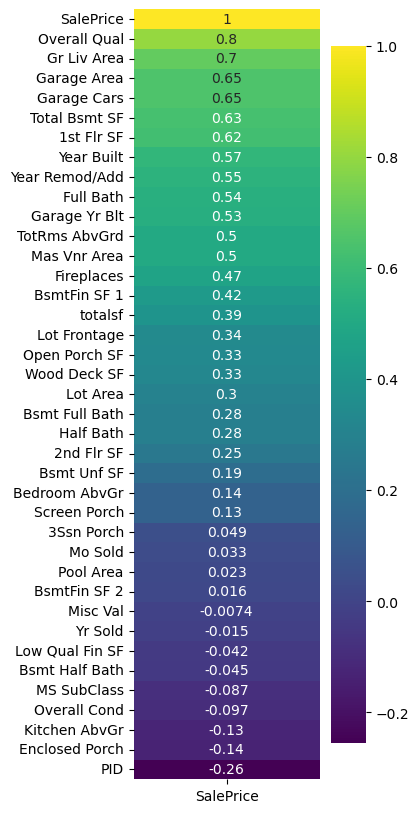

In [16]:
# df_numeric = df[['Mo Sold','Yr Sold','SalePrice','Screen Porch','Pool Area','3Ssn Porch',
#                  'Enclosed Porch','Open Porch SF','Wood Deck SF','Id','PID','MS SubClass',
#                  'Lot Area','Overall Qual','Overall Cond','Year Built','Year Remod/Add',
#                 'Mas Vnr Area','1st Flr SF','2nd Flr SF','Low Qual Fin SF','BsmtFin SF 1',
#                 'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Gr Liv Area','Full Bath','Half Bath',
#                 'Kitchen AbvGr','Bedroom AbvGr','TotRms AbvGrd','Fireplaces','Garage Area','Garage Cars','Garage Yr Blt','Bsmt Half Bath','Bsmt Full Bath']]

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['int', 'float'])

# Create the heatmap
plt.figure(figsize=(3, 10))
sns.heatmap(df_numeric.corr()[['SalePrice']].sort_values(by='SalePrice',ascending = False), 
            annot=True,
            cmap='viridis');

#### Looking at this heat map Overall Condition and MS SubClass should correlate more with sale price. The MS SubClass are designation numbers so dummy variables need to be made where as the Overall Conidtion needs to be looked at more throughly.

In [17]:
# Drop the original column and join the dummies
df = pd.get_dummies(df, 
                    columns = ['MS SubClass'],
                    prefix = 'mssubclass',
                    dtype = int)
df.columns

Index(['PID', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars'

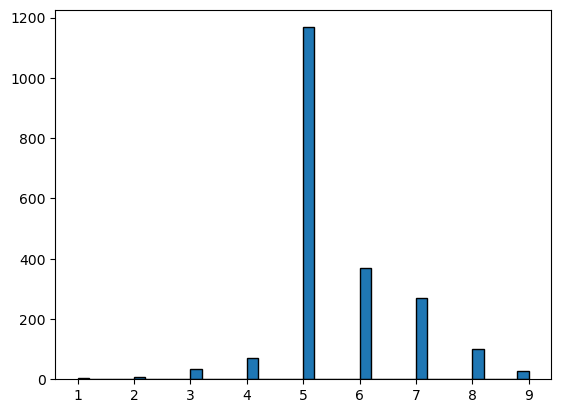

In [18]:
plt.hist(df['Overall Cond'],
        bins = 40,
        edgecolor = 'black');

#### Performed get dummies on MS SubClass to get better correlation and looked at the distribution of Overall condition to see if there was any heavy skewing. It appear the histogram is sleft skewed but is centered on 5 which is corresponds to average. This would mean other factors influcence sale price more and that the overall condition data is fine as is

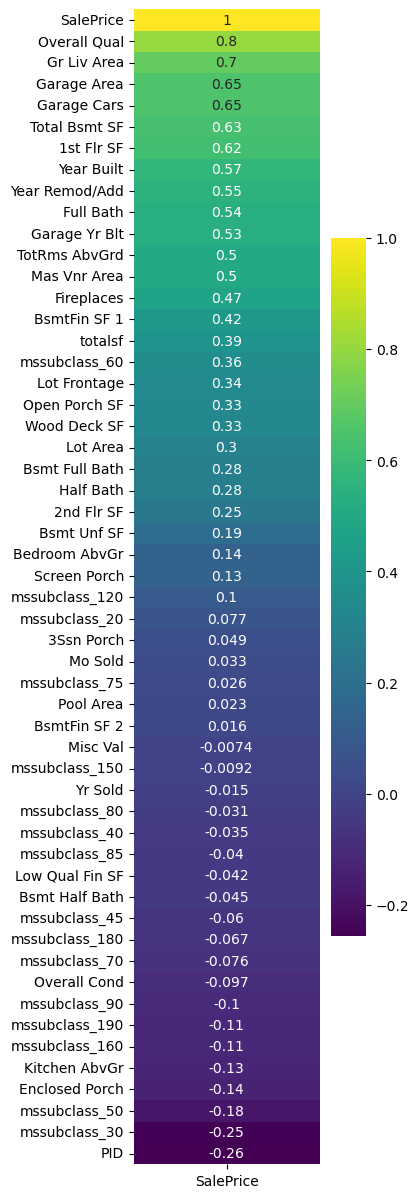

In [19]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['int', 'float'])

# Create the heatmap
plt.figure(figsize=(3, 15))
sns.heatmap(df_numeric.corr()[['SalePrice']].sort_values(by='SalePrice',ascending = False), 
            annot=True,
            cmap='viridis');

#### Replotted heat map with fixed subclass 

## Check Distribution of Sale Price and the Mean

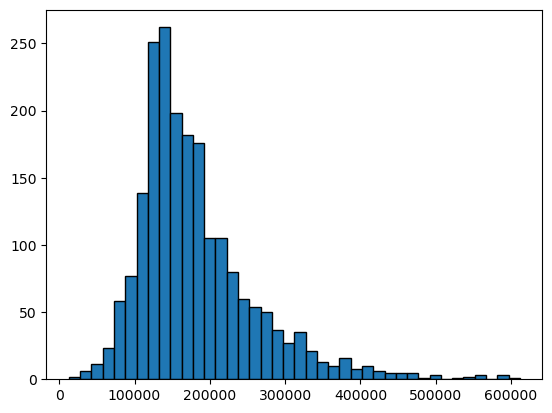

In [20]:
plt.hist(df['SalePrice'],
        bins = 40,
        edgecolor = 'black');

In [21]:
np.mean(df['SalePrice'])

181469.70160897123

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2051 entries, 109 to 10
Data columns (total 96 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS Zoning        2051 non-null   object 
 2   Lot Frontage     1721 non-null   float64
 3   Lot Area         2051 non-null   int64  
 4   Street           2051 non-null   object 
 5   Alley            140 non-null    object 
 6   Lot Shape        2051 non-null   object 
 7   Land Contour     2051 non-null   object 
 8   Utilities        2051 non-null   object 
 9   Lot Config       2051 non-null   object 
 10  Land Slope       2051 non-null   object 
 11  Neighborhood     2051 non-null   object 
 12  Condition 1      2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond     20

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 2658 to 1939
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              878 non-null    int64  
 1   MS SubClass      878 non-null    int64  
 2   MS Zoning        878 non-null    object 
 3   Lot Frontage     718 non-null    float64
 4   Lot Area         878 non-null    int64  
 5   Street           878 non-null    object 
 6   Alley            58 non-null     object 
 7   Lot Shape        878 non-null    object 
 8   Land Contour     878 non-null    object 
 9   Utilities        878 non-null    object 
 10  Lot Config       878 non-null    object 
 11  Land Slope       878 non-null    object 
 12  Neighborhood     878 non-null    object 
 13  Condition 1      878 non-null    object 
 14  Condition 2      878 non-null    object 
 15  Bldg Type        878 non-null    object 
 16  House Style      878 non-null    object 
 17  Overall Qual     

## Fix up Test dataframe to match Training Dataframe 

In [24]:
# fixing MS SubClass to match training data
test = pd.get_dummies(test, 
                    columns = ['MS SubClass'],
                    prefix = 'mssubclass',
                    dtype = int)
df.columns

Index(['PID', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars'

## Make a Model and test

In [52]:
X = df[['PID', 'Overall Qual', 'Gr Liv Area', 'Year Built', 'Garage Area', 'Total Bsmt SF', 'Year Remod/Add', 'TotRms AbvGrd', 'Lot Area','mssubclass_30','BsmtFin SF 1']]
y = df['SalePrice']

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.7911903648294568

In [51]:
lr.score(X_test,y_test)

0.8268617345718579

#### My model is neither under or overfit based on the R^2 score. I believe it is in the sweet spot

## Refit model to all of the data

In [28]:
lr.fit(X,y)

LinearRegression()

In [32]:
preds = lr.predict(test[['PID', 'Overall Qual', 'Gr Liv Area', 'Year Built', 'Garage Area', 'Total Bsmt SF', 'Year Remod/Add', 'TotRms AbvGrd', 'Lot Area','mssubclass_30','BsmtFin SF 1']])
predictions = test.copy()
predictions['SalePrice'] = preds
predictions = predictions[['SalePrice']]
predictions.head()

,SalePrice
Id,
2658,159964.951335
2718,186283.706067
2414,218953.168536
1989,129146.473547
625,176334.962543


## Check Histogram to make sure the predicted prices somewhat match the training set sale price histogram

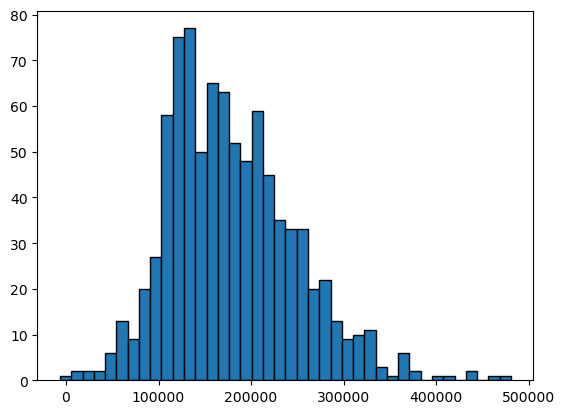

In [34]:
plt.hist(predictions['SalePrice'],
        bins = 40,
        edgecolor = 'black');

## Send these predictions to kaggle 

In [35]:
predictions.to_csv('only_numeric_predictions.csv')